In [1]:
#Assignment Task:
#Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [2]:
#reading the dataset
#importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv")
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [3]:
#Taskes:
#1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [4]:
df.rename(columns={'Age_08_04':'Age'},inplace = True) #rename the age column
df
#I renamed the Age_08_04 column name to Age to make it look appropriate

Price  Age     KM Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
0     13500   23  46986    Diesel   90          0  2000      3          4   
1     13750   23  72937    Diesel   90          0  2000      3          4   
2     13950   24  41711    Diesel   90          0  2000      3          4   
3     14950   26  48000    Diesel   90          0  2000      3          4   
4     13750   30  38500    Diesel   90          0  2000      3          4   
...     ...  ...    ...       ...  ...        ...   ...    ...        ...   
1431   7500   69  20544    Petrol   86          0  1300      3          4   
1432  10845   72  19000    Petrol   86          0  1300      3          4   
1433   8500   71  17016    Petrol   86          0  1300      3          4   
1434   7250   70  16916    Petrol   86          0  1300      3          4   
1435   6950   76      1    Petrol  110          0  1600      5          4   

      Gears  Weight  
0         5    1165  
1         5    1165  
2         5    1165  
3         5    1165  
4         5    1170  
...     ...     ...  
1431      5    1025  
1432      5    1015  
1433      5    1015  
1434      5    1015  
1435      5    1114  

[1436 rows x 11 columns]

In [5]:
df.shape

(1436, 11)

In [6]:
df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [7]:
df.dtypes

Price         int64
Age           int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [9]:
df.describe()

Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [10]:
df.isnull().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [11]:
#Key Insights:
#Price: The min proce of a car is 4350 dollars and max is 32500. The mean and median of price are 10730, 9900.
#Age : The min age of a car is 1 and max age is 80. The mean and medians of age are 56,61.
#By considering the above 2 columns mean and median, I conclude that those both are not normally distributed.
#KM : The min kilo meters travelled by a car is 1 and max KM is 243000. The average distance travelled by a car is 68533.25 and max cars travelled the distance of 63389 KM.
#HP : The min HP of a car is 69 and max HP is 192. Here HP represents the Horse power of a car. For some models of a cars with specific HP. Like mobiles have version. By this we can't do anything with mean and median of the HP.
#Automatic : It contains two categories one Yes(1) and No(0).
##CC : It is also like HP.
#Doors : The cars contains min of 2 doors and max of 5 doors.
#Cylinder : By considering the cylinder column there is only one category of 4.
#Gears : The min no of gears for a car is 3 and max is 6.
#Weight : A car contains min of 1000 kg's and max of 1615 kg's. The avg weight of a cars is 1072 kg's.

In [12]:
df[df['Price']==4350] # find the how many cars with min price of 4350
#from below there is only one car with min price 4350

Price  Age      KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
191   4350   44  158320    Diesel  69          0  1800      5          4   

     Gears  Weight  
191      5    1110

In [13]:
df[df['Age']==80].sort_values(by='Price',ascending=False) #Find how many cars with max age of 80.
#From the below a car with age has max price of 9950 and min of 6150

Price  Age      KM Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
1175   9950   80   94079    Petrol  110          0  1600      5          4   
1307   9950   80   69904    Petrol  110          0  1600      5          4   
1182   9900   80   92255    Petrol  107          1  1600      5          4   
1081   9500   80  137178    Diesel   90          0  2000      5          4   
1323   9450   80   66843    Petrol  110          0  1600      5          4   
1408   9250   80   44444    Petrol  110          0  1600      3          4   
1090   9250   80  128351    Petrol  110          0  1600      5          4   
1176   9250   80   93841    Petrol  110          0  1600      5          4   
1274   9000   80   74196    Petrol  110          0  1600      5          4   
1339   9000   80   63266    Petrol  110          0  1600      4          4   
1335   8950   80   64000    Petrol  110          0  1600      3          4   
1230   8950   80   83540    Petrol  110          0  1600      5          4   
1367   8950   80   58000    Petrol  110          0  1600      3          4   
1215   8950   80   86000    Petrol  110          0  1600      3          4   
1240   8750   80   82021    Petrol   86          0  1300      5          4   
1359   8750   80   59326    Petrol  110          0  1600      5          4   
1152   8500   80  100458    Petrol  110          0  1600      5          4   
1303   8500   80   70597    Petrol  107          1  1600      3          4   
1430   8450   80   23000    Petrol   86          0  1300      3          4   
1211   8250   80   87000    Petrol   86          0  1300      3          4   
1353   8250   80   60476    Petrol  110          0  1600      5          4   
1217   8250   80   85565    Petrol  110          0  1600      5          4   
1369   8250   80   57787    Petrol   86          0  1300      3          4   
1366   8250   80   58267    Petrol  110          0  1600      5          4   
1258   8250   80   76000    Petrol  110          0  1600      3          4   
1385   8250   80   52700    Petrol  110          0  1600      3          4   
1425   7950   80   34000    Petrol   86          0  1300      4          4   
1423   7950   80   35821    Petrol   86          1  1300      3          4   
1162   7950   80   97548    Petrol   86          0  1300      5          4   
1142   7950   80  102300    Petrol   86          0  1300      3          4   
1375   7750   80   57000    Petrol   86          0  1300      4          4   
1282   7500   80   73200    Petrol  110          0  1600      5          4   
1295   7500   80   71500    Petrol  110          0  1600      4          4   
1414   7500   80   42186    Petrol  110          0  1600      3          4   
1338   7499   80   63500    Petrol  110          0  1600      3          4   
1122   7460   80  111392       CNG  110          0  1598      3          4   
1394   7450   80   49580    Petrol  110          0  1600      4          4   
1326   7400   80   65950    Petrol  110          0  1600      5          4   
1183   7300   80   92096    Petrol   86          0  1300      5          4   
1321   7250   80   66880    Petrol  110          0  1600      3          4   
1124   7250   80  110887    Petrol  110          0  1600      3          4   
1275   7250   80   74151    Petrol  110          0  1600      3          4   
1174   7250   80   94447    Petrol  110          0  1600      3          4   
1104   7250   80  122820    Petrol   86          0  1300      5          4   
1271   7145   80   74785    Petrol  110          0  1600      5          4   
1294   6950   80   71740    Petrol  110          0  1600      5          4   
1341   6950   80   62581    Petrol  110          0  1600      5          4   
1226   6950   80   84000    Petrol  110          0  1600      5          4   
1077   6950   80  143560    Petrol   86          1  1300      3          4   
1301   6900   80   70939    Petrol  110          1  1600      5          4   
1328   6900   80   65307    

In [14]:
df['Cylinders'].value_counts() #finding count of unique values of cylinders column
#From below all cars contains max of 4 cylinders.

Cylinders
4    1436
Name: count, dtype: int64

In [15]:
df.drop(columns=['Cylinders'],inplace=True) #Removing the cylinder column because it cointains only one unique value
df.head()

Price  Age     KM Fuel_Type  HP  Automatic    cc  Doors  Gears  Weight
0  13500   23  46986    Diesel  90          0  2000      3      5    1165
1  13750   23  72937    Diesel  90          0  2000      3      5    1165
2  13950   24  41711    Diesel  90          0  2000      3      5    1165
3  14950   26  48000    Diesel  90          0  2000      3      5    1165
4  13750   30  38500    Diesel  90          0  2000      3      5    1170

In [16]:
df[df.duplicated()] #Finding duplicate values in the dataset

Price  Age     KM Fuel_Type   HP  Automatic    cc  Doors  Gears  Weight
113  24950    8  13253    Diesel  116          0  2000      5      5    1320

In [17]:
df[(df['Price']==24950) & (df['Age']==8)] #Finding which rows are duplicated

Price  Age     KM Fuel_Type   HP  Automatic    cc  Doors  Gears  Weight
112  24950    8  13253    Diesel  116          0  2000      5      5    1320
113  24950    8  13253    Diesel  116          0  2000      5      5    1320

In [18]:
df.drop(index=112,inplace=True) #Deleting duplicate column
df.head()

Price  Age     KM Fuel_Type  HP  Automatic    cc  Doors  Gears  Weight
0  13500   23  46986    Diesel  90          0  2000      3      5    1165
1  13750   23  72937    Diesel  90          0  2000      3      5    1165
2  13950   24  41711    Diesel  90          0  2000      3      5    1165
3  14950   26  48000    Diesel  90          0  2000      3      5    1165
4  13750   30  38500    Diesel  90          0  2000      3      5    1170

In [19]:
df.shape #Finding the row is delete or not using shape of the data

(1435, 10)

In [20]:
df.isna().sum() #finding the null values in the dataset
#from below i found out that there are no missing or null values

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

In [21]:
import plotly.express as px
fig = px.box(df[df.describe().columns],template='plotly_dark') #Creating the box plot for data for finding the outliers
fig.update_layout(title='Box Plot for Toyoto Dataset')
fig.show()

In [22]:
#from above plot KM column contains max outliers and also price column 

In [23]:
def outliers_detection(df): #Creating the function for detecting the outliers in the dataset
    outliers = pd.DataFrame() #Creating the dataframe to append the outliers
    for i in df.describe().columns:
        q1 = df[i].quantile(0.25) #Finding the first quantile of column
        q3 = df[i].quantile(0.75) #Finding the third quantile of column

        IQR = q3 - q1 #Finding the Interquartile range

        lower_bound = q1 - (1.5 * IQR) #finding the lower bound of column
        upper_bound = q3 + (1.5 * IQR) #finding the upper bound of column

        out = df[(df[i]<lower_bound) | (df[i]>upper_bound)] #Finding the outliers in the dataset
        outliers = pd.concat([outliers,out]) #Append the outliers to dataframe

    return outliers #Return the outliers from the dataset

In [24]:
outliers = outliers_detection(df)
df_outliers = outliers.drop_duplicates().reset_index().drop('index',axis=1) #Create a separate dataframe for outliers by droping duplicates
df_outliers

Price  Age     KM Fuel_Type   HP  Automatic    cc  Doors  Gears  Weight
0    18600   30  75889    Diesel   90          0  2000      3      5    1245
1    21500   27  19700    Petrol  192          0  1800      3      5    1185
2    20950   25  31461    Petrol  192          0  1800      3      6    1185
3    19950   22  43610    Petrol  192          0  1800      3      6    1185
4    19600   25  32189    Petrol  192          0  1800      3      6    1185
..     ...  ...    ...       ...  ...        ...   ...    ...    ...     ...
332  10450   65  36000    Petrol  110          0  1600      3      6    1065
333  10950   62  35512    Petrol  110          0  1600      3      6    1065
334  10750   60  31480    Petrol  110          0  1600      3      6    1065
335  12450   44  74172    Petrol  110          0  1600      5      5    1615
336   9390   66  50806    Petrol   86          0  1300      3      5    1480

[337 rows x 10 columns]

In [25]:
data = df[~df.index.isin(outliers.index)] #Creating dataframe by removing the outliers in the dataset
df = data.reset_index().drop('index',axis=True)
df

Price  Age     KM Fuel_Type   HP  Automatic    cc  Doors  Gears  Weight
0     12950   23  71138    Diesel   69          0  1900      3      5    1105
1     16750   24  25563    Petrol  110          0  1600      3      5    1065
2     16950   30  64359    Petrol  110          0  1600      3      5    1105
3     15950   30  67660    Petrol  110          0  1600      3      5    1105
4     15950   28  56349    Petrol  110          0  1600      3      5    1120
...     ...  ...    ...       ...  ...        ...   ...    ...    ...     ...
1093   7500   69  20544    Petrol   86          0  1300      3      5    1025
1094  10845   72  19000    Petrol   86          0  1300      3      5    1015
1095   8500   71  17016    Petrol   86          0  1300      3      5    1015
1096   7250   70  16916    Petrol   86          0  1300      3      5    1015
1097   6950   76      1    Petrol  110          0  1600      5      5    1114

[1098 rows x 10 columns]

In [26]:
df['Gears'].value_counts() #Finding the unque value counts in the gears colums
#After removing the outliers there is only one category in the gears column.

Gears
5    1098
Name: count, dtype: int64

In [27]:
df.drop(columns='Gears',inplace=True) #Removing the gears column because it cointains only one unique value

In [28]:
print(df.shape)
df.head()

(1098, 9)


Price  Age     KM Fuel_Type   HP  Automatic    cc  Doors  Weight
0  12950   23  71138    Diesel   69          0  1900      3    1105
1  16750   24  25563    Petrol  110          0  1600      3    1065
2  16950   30  64359    Petrol  110          0  1600      3    1105
3  15950   30  67660    Petrol  110          0  1600      3    1105
4  15950   28  56349    Petrol  110          0  1600      3    1120

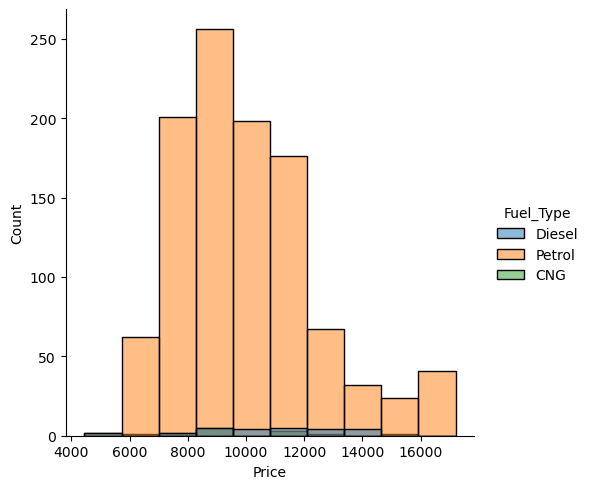

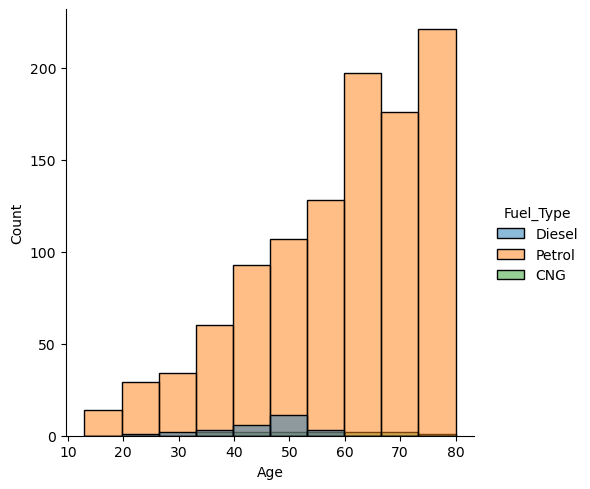

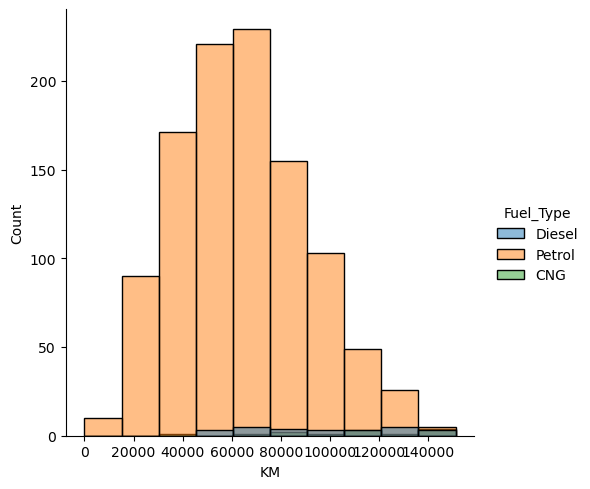

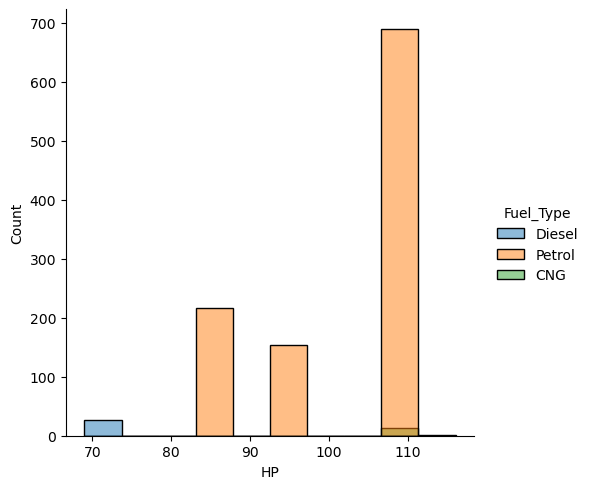

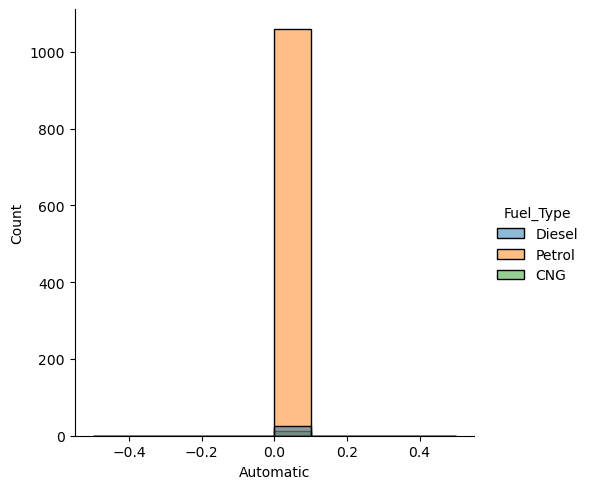

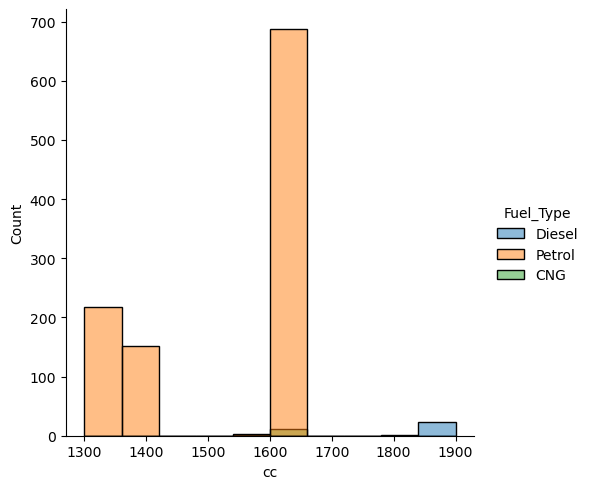

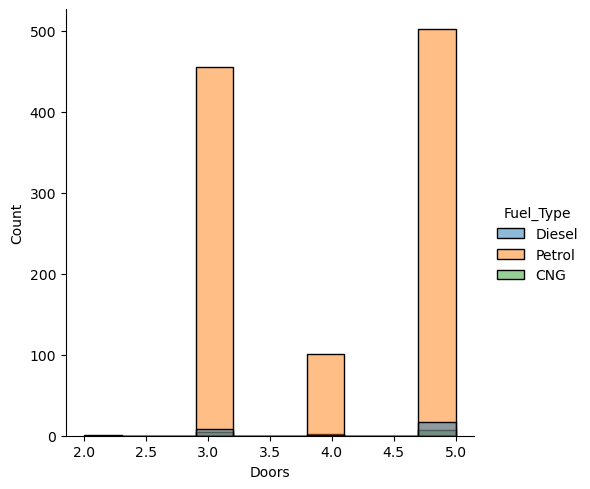

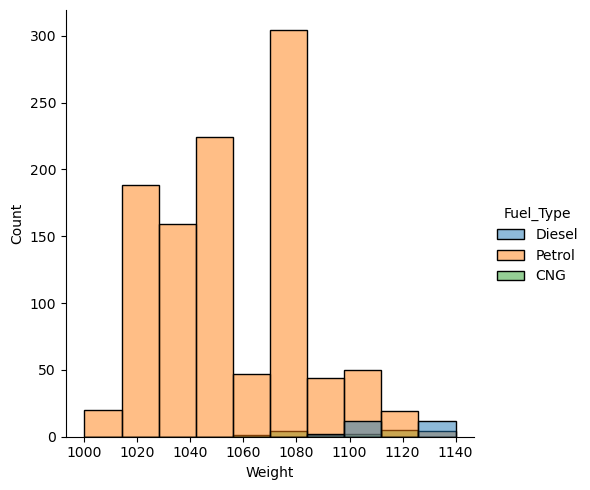

In [29]:
for i in df.describe().columns: #Ploting the histogram for numerical columns
    sns.displot(data=df,x=i,bins=10,hue='Fuel_Type')
    plt.show()

In [30]:
#From above histogram plots:
#Price and Age columns are skewed and KM coluns is normally distribuated.
#Remaing columns contains some distinct categories except Weight column.
#Weight column contains some unusual distributions in the column.

In [31]:
df['HP'].value_counts() #Finding the unque value counts in HP column

HP
110    702
86     216
97     153
69      26
116      1
Name: count, dtype: int64

In [32]:
data=df['Fuel_Type'].value_counts().reset_index() #Finding the unque value counts in fuel type column
data

Fuel_Type  count
0    Petrol   1059
1    Diesel     26
2       CNG     13

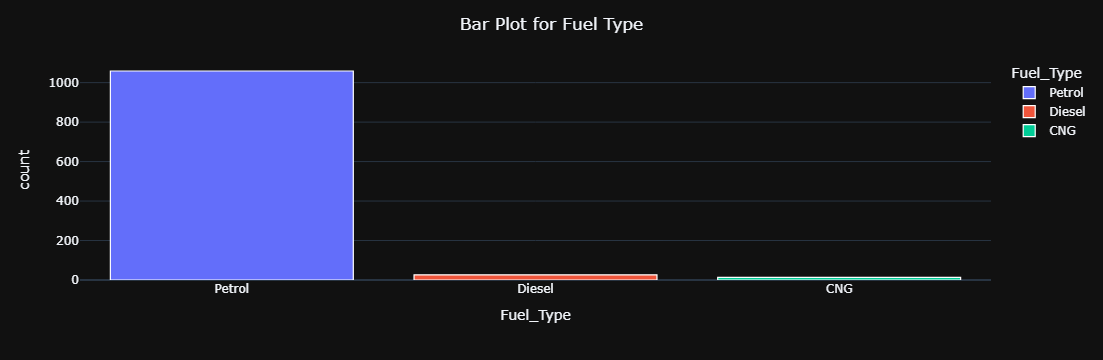

In [33]:
fig = px.bar(data,x='Fuel_Type',y='count',template='plotly_dark',color='Fuel_Type') #Ploting the bar plot for fuel type column
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Fuel Type',
                 title_x=0.5)
fig.show()

In [34]:
#From the above plot:
#There are 3 different types of categories.
#Petrol
#Diesel
#CNG
#Among those 3 categories maximum cars are belongs to the petrol category

In [35]:
columns = df.describe().columns
columns = columns[:4].append(columns[5:])
columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Weight'], dtype='object')

In [36]:
corr = df[columns].corr() #Finding the correlation between numeric column
corr

Price       Age        KM        HP        cc     Doors    Weight
Price   1.000000 -0.867168 -0.531257  0.111864  0.109523  0.178103  0.472660
Age    -0.867168  1.000000  0.468104  0.011544 -0.066002 -0.102536 -0.388867
KM     -0.531257  0.468104  1.000000 -0.046861  0.142423  0.010608 -0.030156
HP      0.111864  0.011544 -0.046861  1.000000  0.592455  0.170784  0.308100
cc      0.109523 -0.066002  0.142423  0.592455  1.000000  0.218468  0.617273
Doors   0.178103 -0.102536  0.010608  0.170784  0.218468  1.000000  0.535303
Weight  0.472660 -0.388867 -0.030156  0.308100  0.617273  0.535303  1.000000

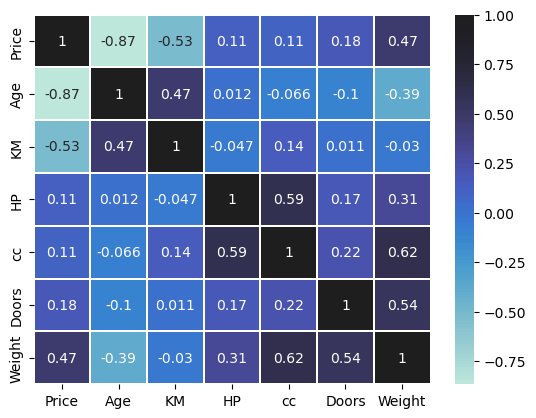

In [37]:
sns.heatmap(data=corr,annot=True,center=True,linecolor='white',linewidths=1.2) #Ploting the correlation matrix using seaborn heatmap
plt.show()

In [38]:
#From the above correlation plot:
#Price and Age are Hightly negatively correlated, It means when the Age of a car is increased then price of a cars is decreased. Vice Versa.
#Price and KM, Weight are moderatley correlated with each other.

In [39]:
fig = px.scatter(df,x='Age',y='Price',template='plotly_dark',color='Price') #Finding the correlation between price and age using scatter plot
fig.update_layout(title='Scatter Plot for Age and Price')
fig.show()

In [40]:
fig = px.scatter(df,y='Weight',x='KM',template='plotly_dark',color='Weight') #Finding the coreelation between weight and km
fig.update_layout(title='Scatter Plot for Weight and KM')
fig.show()

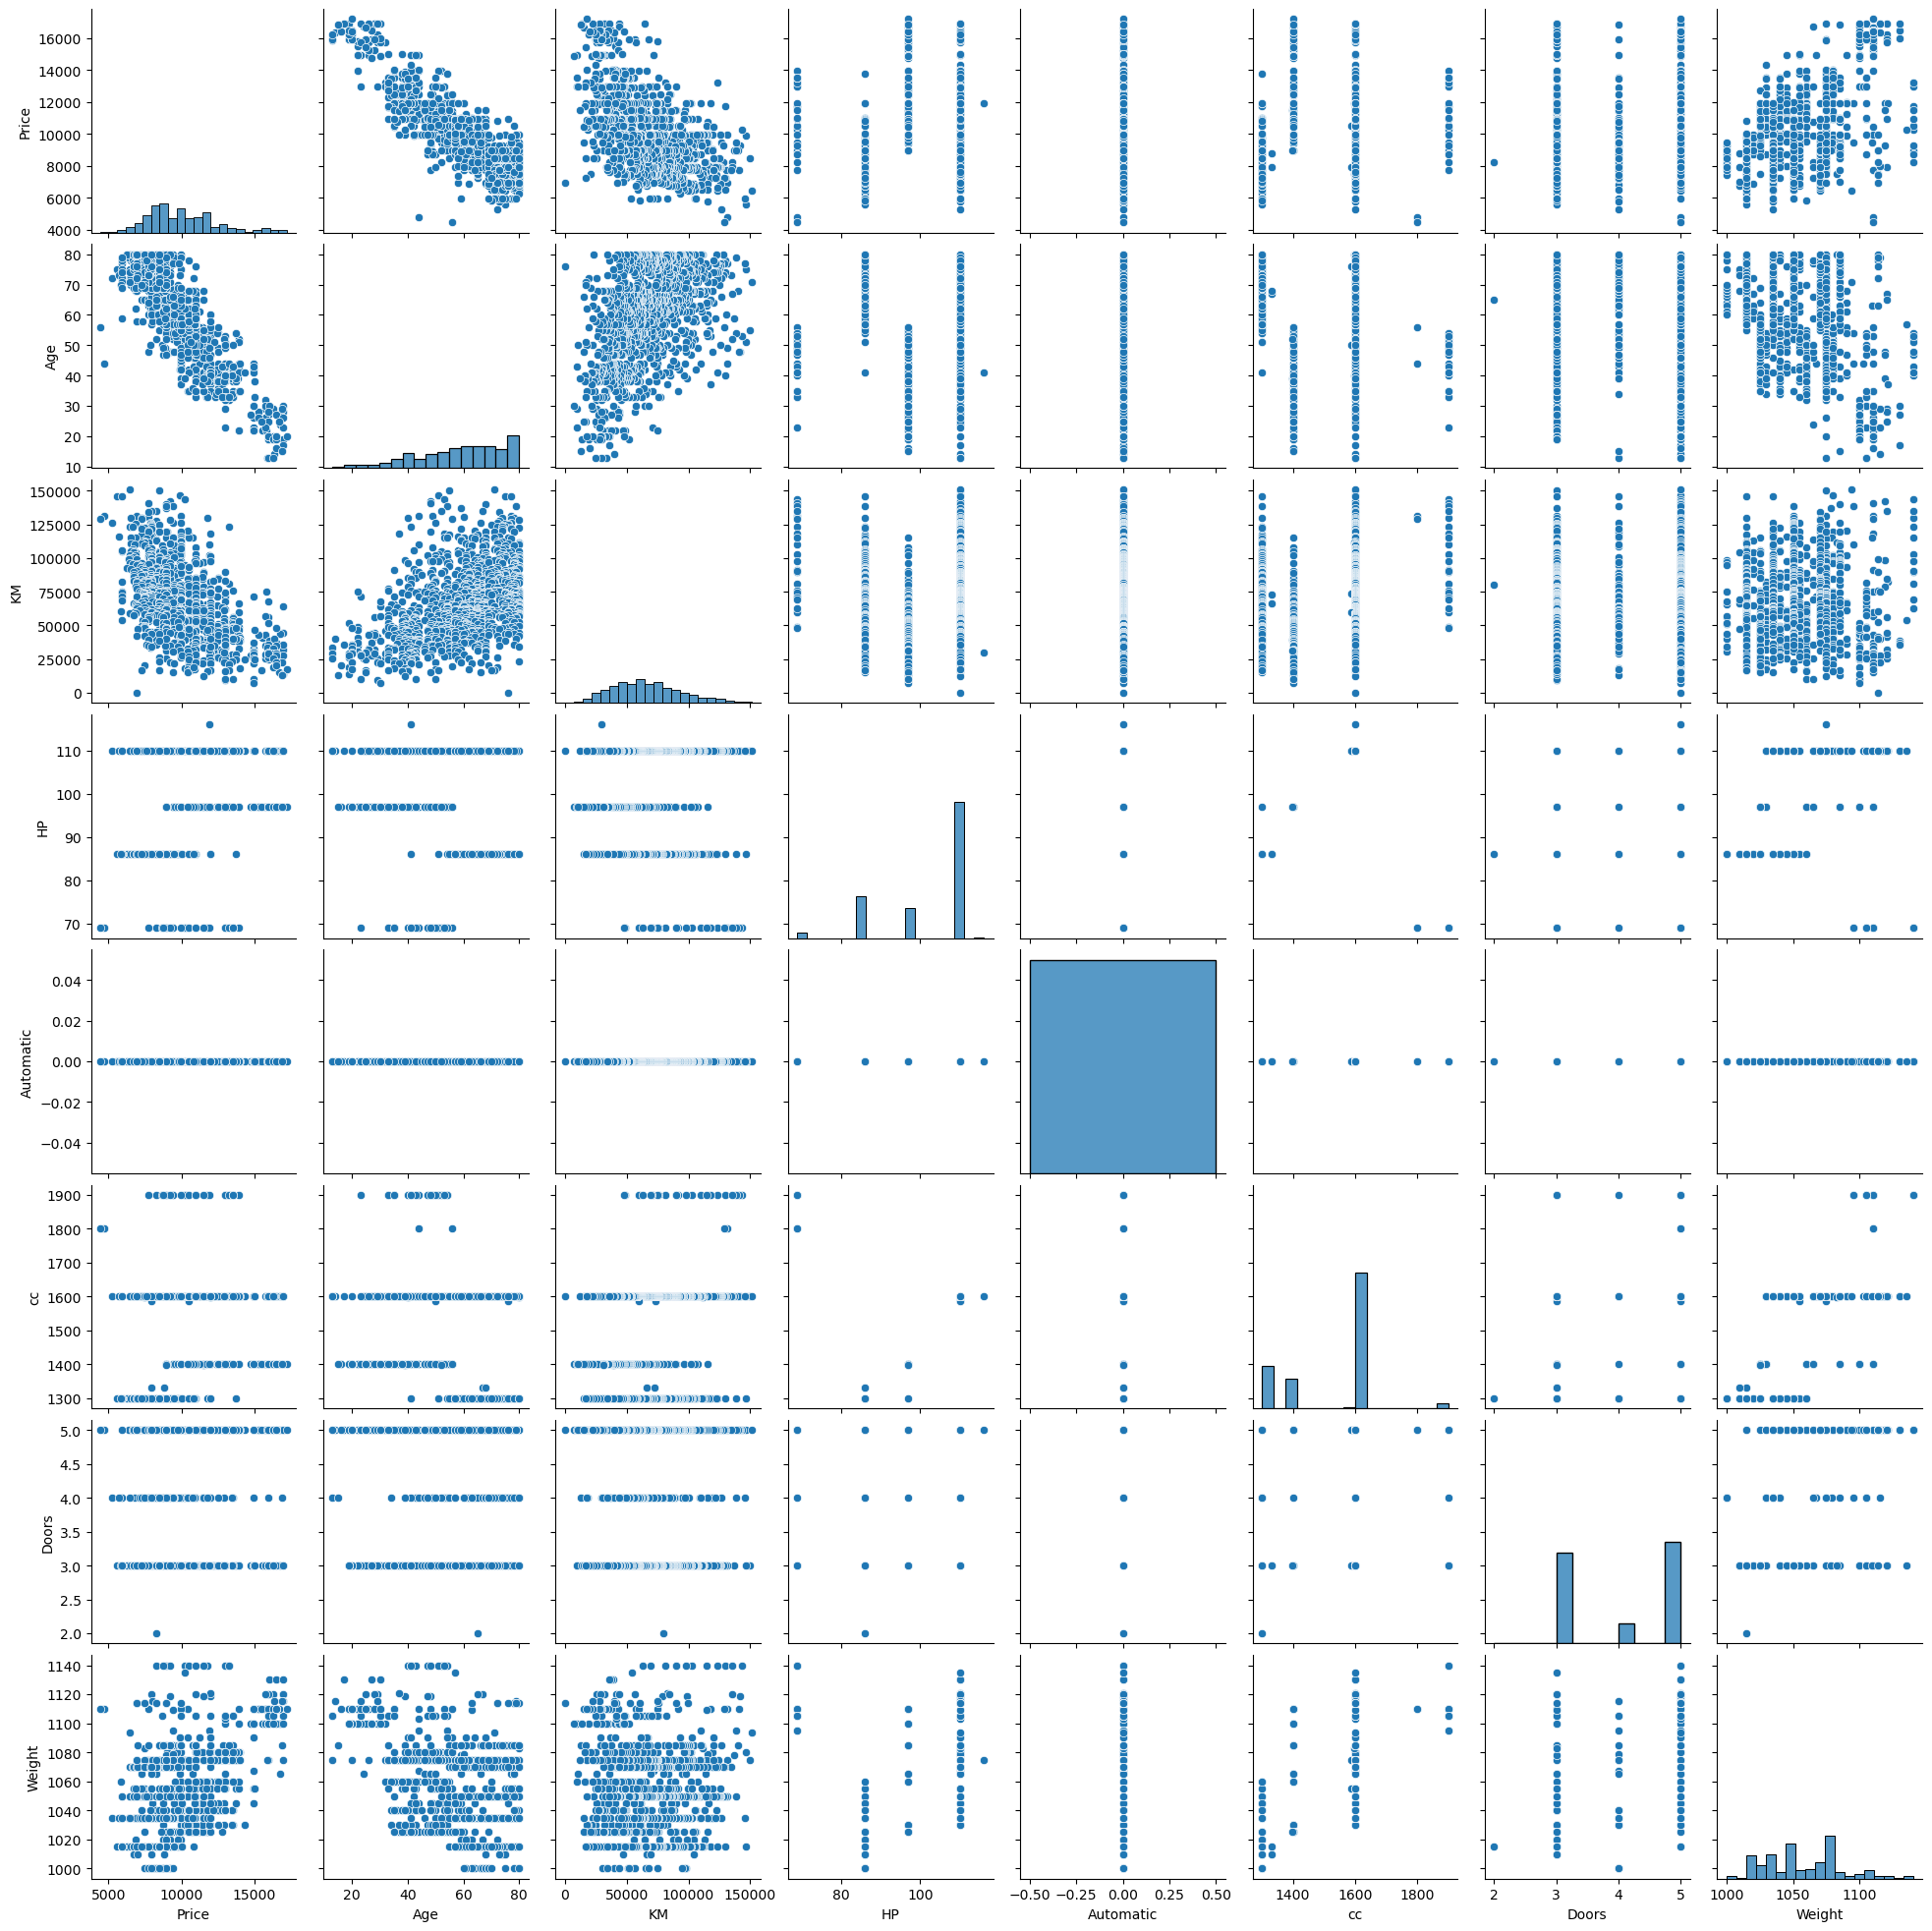

In [41]:
sns.pairplot(df[df.describe().columns]) #Ploting the pair plot for finding the correlation between each column in the dataset
plt.show()

In [42]:
#(age,km)
#(age,weight)
#(km,weight)
#above three are inter correaleted with each other or perform multy colinearity.

In [43]:
df['Automatic'].value_counts()

Automatic
0    1098
Name: count, dtype: int64

In [44]:
df.drop('Automatic',axis=1,inplace=True)
df.head()

Price  Age     KM Fuel_Type   HP    cc  Doors  Weight
0  12950   23  71138    Diesel   69  1900      3    1105
1  16750   24  25563    Petrol  110  1600      3    1065
2  16950   30  64359    Petrol  110  1600      3    1105
3  15950   30  67660    Petrol  110  1600      3    1105
4  15950   28  56349    Petrol  110  1600      3    1120

In [45]:
Fuel = pd.get_dummies(df['Fuel_Type'],drop_first=True).astype(int) #Creating the dummy values for categorical variables by droping the first column
Fuel.head()

Diesel  Petrol
0       1       0
1       0       1
2       0       1
3       0       1
4       0       1

In [46]:
df = pd.concat([df,Fuel],axis=1) #Add the dummy values to dataset
df

Price  Age     KM Fuel_Type   HP    cc  Doors  Weight  Diesel  Petrol
0     12950   23  71138    Diesel   69  1900      3    1105       1       0
1     16750   24  25563    Petrol  110  1600      3    1065       0       1
2     16950   30  64359    Petrol  110  1600      3    1105       0       1
3     15950   30  67660    Petrol  110  1600      3    1105       0       1
4     15950   28  56349    Petrol  110  1600      3    1120       0       1
...     ...  ...    ...       ...  ...   ...    ...     ...     ...     ...
1093   7500   69  20544    Petrol   86  1300      3    1025       0       1
1094  10845   72  19000    Petrol   86  1300      3    1015       0       1
1095   8500   71  17016    Petrol   86  1300      3    1015       0       1
1096   7250   70  16916    Petrol   86  1300      3    1015       0       1
1097   6950   76      1    Petrol  110  1600      5    1114       0       1

[1098 rows x 10 columns]

In [47]:
df.drop('Fuel_Type',axis=1,inplace=True) #Removing the fuel type column because we have dummy values instead of that
df.head()

Price  Age     KM   HP    cc  Doors  Weight  Diesel  Petrol
0  12950   23  71138   69  1900      3    1105       1       0
1  16750   24  25563  110  1600      3    1065       0       1
2  16950   30  64359  110  1600      3    1105       0       1
3  15950   30  67660  110  1600      3    1105       0       1
4  15950   28  56349  110  1600      3    1120       0       1

In [48]:
#2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [49]:
from sklearn.linear_model import LinearRegression #Importing the regression model
from sklearn.model_selection import train_test_split #importing the train test split module from scikit learn

In [50]:
Y1 = df['Price'] #separating the dependent and independent variables
Y2 = df['Price']
Y3 = df['Price']
x1 = df.drop(columns=['Price','Weight','Age'])
x2 = df.drop(columns=['Price','KM','Age'])
x3 = df.drop(columns=['Price','KM','Weight'])

In [51]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x1,Y1,random_state=42,test_size=0.2) #Separating the dependent and independent variables as test,train data respectively
X2_train,X2_test,y2_train,y2_test = train_test_split(x2,Y2,random_state=42,test_size=0.2)
X3_train,X3_test,y3_train,y3_test = train_test_split(x3,Y3,random_state=42,test_size=0.2)

In [52]:
print("Train Data :",X1_train.shape,y1_train.shape) #Finding the shape of train and test data
print("Test Data :",X1_test.shape,y1_test.shape)

Train Data : (878, 6) (878,)
Test Data : (220, 6) (220,)


In [53]:
#3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [54]:
model1 = LinearRegression() #Accessing the linear regression model
model2 = LinearRegression()
model3 = LinearRegression()

In [55]:
model1.fit(X1_train,y1_train) #Training the models
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

LinearRegression()

In [56]:
#Interpret the coefficients of the model
print(f"Intercept: {model1.intercept_}") #Finding the intercepts of model1

Intercept: 17835.33775437896


In [57]:
for i,j in enumerate(x1.columns):
    print(f"The coefficient for {j} is {model1.coef_[i]}") #Finding the coefficients of each column

The coefficient for KM is -0.04228334984889842
The coefficient for HP is 587.5626574180052
The coefficient for cc is -43.176625540784585
The coefficient for Doors is 339.2061707675044
The coefficient for Diesel is 36532.122813233604
The coefficient for Petrol is -1914.4685984172347


In [58]:
#Interpreting the Beta Coefficients For Model1:
#With a unit increase in KM, we shall see 0.042283 unit decrease in the Price
#With a unit increase in HP, we shall see 587.562657 unit increase in the Price
#With a unit increase in cc, we shall see 43.1766255 unit decrease in the Price
#With a unit increase in Doors, we shall see 339.206170 unit increase in the Price
#With a unit increase in Diesel, we shall see 36532.122813 unit increase in the Price
#With a unit increase in Petrol, we shall see 1914.468598 unit decrease in the Price

In [59]:
print(f"Intercept: {model2.intercept_}") #Finding the intercepts of model2

Intercept: -32369.955619602704


In [60]:
for i,j in enumerate(x2.columns): #Finding the coefficients of each column
    print(f"The coefficient for {j} is {model2.coef_[i]}")

The coefficient for HP is 559.5504705072458
The coefficient for cc is -46.729707440496426
The coefficient for Doors is -299.3623457255621
The coefficient for Weight is 52.05363603754354
The coefficient for Diesel is 35743.11356904019
The coefficient for Petrol is 1491.077150380459


In [61]:
#Interpreting the Beta Coefficients For Model2:
#With a unit increase in Weight, we shall see 52.053636 unit increase in the Price
#With a unit increase in HP, we shall see 559.550470 unit increase in the Price
#With a unit increase in cc, we shall see 46.729707 unit decrease in the Price
#With a unit increase in Doors, we shall see 299.362345 unit decrease in the Price
#With a unit increase in Diesel, we shall see 35743.113569 unit increase in the Price
#With a unit increase in Petrol, we shall see 1491.077150 unit increase in the Price

In [62]:
print(f"Intercept: {model3.intercept_}") #Finding the intercepts of model3

Intercept: 13487.344396515875


In [63]:
for i,j in enumerate(x3.columns): #Finding the coefficients of each column
    print(f"The coefficient for {j} is {model3.coef_[i]}")

The coefficient for Age is -132.6129944807593
The coefficient for HP is -56.796965173925
The coefficient for cc is 5.9415899160247605
The coefficient for Doors is 162.3098450101294
The coefficient for Diesel is -4874.270402020372
The coefficient for Petrol is 606.7594185040647


In [64]:
#Interpreting the Beta Coefficients For Model3:
#With a unit increase in Age, we shall see 132.612994 unit decrease in the Price
#With a unit increase in HP, we shall see 56.796965 unit decrease in the Price
#With a unit increase in cc, we shall see 5.941589 unit increase in the Price
#With a unit increase in Doors, we shall see 162.309845 unit increase in the Price
#With a unit increase in Diesel, we shall see 4874.270402 unit decrease in the Price
#With a unit increase in Petrol, we shall see 606.759418 unit increase in the Price

In [65]:
Y1_pred = model1.predict(X1_test) #Predict the datapoints using the trained model with the help of test data
Y2_pred = model2.predict(X2_test)
Y3_pred = model3.predict(X3_test)

In [66]:
#4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [67]:
#Performance Metrics for Model1

In [68]:
def adj_r2(a,b,c): #Creating a function for calculate adj r2 value of models
    r2 = metrics.r2_score(a,b) #To find the r squared value of model
    n = 878 #length of sample size taken from shape of x_train
    p = len(c.coef_) #Find the no of coefficient values
    return 1-(1-r2)*(n-1)/(n-p-1) #Return adjusted r squared value

In [69]:
from sklearn import metrics #Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset for model1
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, Y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, Y1_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y1_test, Y1_pred, squared=False))
print('R_Squared Error :',metrics.r2_score(y1_test, Y1_pred))
print('Adj R_Squared Error :',adj_r2(y1_test, Y1_pred,model1))

Mean Absolute Error: 1431.6235603438506
Mean Squared Error: 3587213.4988875315
Root Mean Squared Error: 1893.9940598870767
R_Squared Error : 0.38681385098526233
Adj R_Squared Error : 0.3825898361814869


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [70]:
#Performance Metrics for Model2

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, Y2_pred)) #Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset for model1
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, Y2_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y2_test, Y2_pred, squared=False))
print('R_Squared Error :',metrics.r2_score(y2_test, Y2_pred))
print('Adj R_Squared Error :',adj_r2(y2_test, Y2_pred,model2))

Mean Absolute Error: 1468.67292751144
Mean Squared Error: 3644073.650470892
Root Mean Squared Error: 1908.945690812311
R_Squared Error : 0.37709436888791636
Adj R_Squared Error : 0.3728034001316908


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [72]:
#Performance Metrics for Model3

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, Y3_pred)) #Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset for model1
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, Y3_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y3_test, Y3_pred, squared=False))
print('R_Squared Error :',metrics.r2_score(y3_test, Y3_pred))
print('Adj R_Squared Error :',adj_r2(y3_test, Y3_pred,model3))

Mean Absolute Error: 889.547644469968
Mean Squared Error: 1230183.4627745682
Root Mean Squared Error: 1109.136358963391
R_Squared Error : 0.7897165974776004
Adj R_Squared Error : 0.7882680321330144


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [74]:
#5.Apply Lasso and Ridge methods on the model.

In [75]:
#Ridge for model1

In [76]:
from sklearn.linear_model import Ridge #Applying the redge regression to the train and test data
ridgereg1 = Ridge(alpha=0.01)
ridgereg1.fit(X1_train,y1_train)
y_pred = ridgereg1.predict(X1_test)
print('R_Squared Error :',metrics.r2_score(y1_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y1_test, y_pred,ridgereg1))

R_Squared Error : 0.388864336421622
Adj R_Squared Error : 0.3846544466610361


In [77]:
#Ridge for model2

In [78]:
ridgereg2 = Ridge(alpha=0.01)
ridgereg2.fit(X2_train,y2_train)
y_pred = ridgereg2.predict(X2_test)
print('R_Squared Error :',metrics.r2_score(y2_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y2_test, y_pred,ridgereg2))

R_Squared Error : 0.37988413272370947
Adj R_Squared Error : 0.3756123816288096


In [79]:
#Ridge for model3

In [80]:
ridgereg3 = Ridge(alpha=0.01)
ridgereg3.fit(X3_train,y3_train)
y_pred = ridgereg3.predict(X3_test)
print('R_Squared Error :',metrics.r2_score(y3_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y3_test, y_pred,ridgereg3))

R_Squared Error : 0.7894809567429267
Adj R_Squared Error : 0.788030768155622


In [81]:
#Lasso for Model1

In [82]:
from sklearn.linear_model import Lasso #Applying the lasso regression to the train and test data
lassoreg1 = Lasso(alpha=0.01)
lassoreg1.fit(X1_train,y1_train)
y_pred = lassoreg1.predict(X1_test)
print('R_Squared Error :',metrics.r2_score(y1_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y1_test, y_pred,lassoreg1))

R_Squared Error : 0.38692496092477213
Adj R_Squared Error : 0.3827017115166764


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+09, tolerance: 4.756e+05



In [83]:
#Lasso for Model2

In [84]:
lassoreg2 = Lasso(alpha=0.01)
lassoreg2.fit(X2_train,y2_train)
y_pred = lassoreg2.predict(X2_test)
print('R_Squared Error :',metrics.r2_score(y2_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y2_test, y_pred,lassoreg2))

R_Squared Error : 0.3772581231774309
Adj R_Squared Error : 0.3729682824645315


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.526e+09, tolerance: 4.756e+05



In [85]:
#Lasso for Model3

In [86]:
lassoreg3 = Lasso(alpha=0.01)
lassoreg3.fit(X3_train,y3_train)
y_pred = lassoreg3.predict(X3_test)
print('R_Squared Error :',metrics.r2_score(y3_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y3_test,y_pred,lassoreg3))

R_Squared Error : 0.7896542142069656
Adj R_Squared Error : 0.7882052191268758


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.265e+08, tolerance: 4.756e+05



In [87]:
#Conclusion:
#From above when compared to other models model gives high accuracy.
#So, when compared to other columns Age column gives the High accuracy

In [88]:
#Interview Questions:
#1.What is Normalization & Standardization and how is it helpful?
#Normalization: It is the process of rescaling the values of features (independent variables) in the dataset to a fixed range, typically between 0 and 1. It is also sometimes referred to as Min-Max scaling.
#Use Cases:
#- Helpful in algorithms sensitive to the scale of data, such as k-Nearest Neighbors (k-NN) and gradient descent-based models like Neural Networks.
#- Ensures all features contribute equally when computing distances (e.g., Euclidean Distance in clustering or k-NN).

#Standardization: scales the features such that they have a mean of 0 and a standard deviation of 1, converting data into a standard normal distribution.
#Use Cases:
#- Widely used in algorithms that assume data is normally distributed, like Linear Regression, Logistic Regression, SVMs, and PCA (Principal Component Analysis).
#- Helps ensure numerical stability, especially for algorithms with gradients.

#Why is it Helpful?
#- Prevents Bias: Features on larger scales won't dominate smaller features in calculations (e.g., distances, gradients).
#- Improves Convergence: Many machine learning models converge faster when features are scaled.
#- Ensures Fair Comparisons: Features with different units (e.g., age in years vs. salary in millions) are brought to comparable scales.

In [89]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?
#Transform the correlated features into a smaller set of uncorrelated components (principal components).
#Use Ridge Regression (L2 regularization) or Lasso Regression (L1 regularization).
#Remove or Combine Highly Correlated Features.